In [1]:
#import libraries
import momepy as mm
import geopandas as gpd
import matplotlib.pyplot as plt 
import pandas as pd 
import os 
import libpysal
import numpy as np
import shapely
import mapclassify
import seaborn as sns

from scipy.spatial import Voronoi
from shapely.geometry.base import BaseGeometry
from shapely.ops import polygonize
from tqdm.auto import tqdm
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
path = '/home/jovyan/private/Thesis/Accra/GOB/'
path_1 = '/home/jovyan/private/Thesis/Accra/streets/'
path_2 = '/home/jovyan/private/Thesis/Accra/tessellation/'
path_3 = '/home/jovyan/private/Thesis/Accra/street_blocks/'

In [3]:
#load datasets 
#create tessellation
Buildings = gpd.read_file(path + 'Accra_bf_hgt_V3.shp')
Streets = gpd.read_file(path_1 + 'A_Streets_V1.shp')
Tessellation = gpd.read_file(path_2 + 'tessellation_V1.shp')
Blocks = gpd.read_file(path_3 + 'blocks_df.shp')

In [10]:
Buildings.rename(columns={'wsf_h': 'height'}, inplace=True)

Buildings

,area_in_me,confidence,uID,height,nID,area,bID,geometry,bArea
0,9.3122,0.6959,0,5.8,83732.0,9.283862,8458.0,"POLYGON ((791577.042 629666.237, 791573.828 62...",9.283862
1,70.8945,0.7786,1,2.1,57174.0,70.716852,30173.0,"POLYGON ((826367.447 639126.101, 826360.199 63...",70.716852
2,50.4452,0.7740,3,2.6,101531.0,50.314099,21172.0,"POLYGON ((820910.153 626010.943, 820901.649 62...",50.314099
3,139.7696,0.8939,4,2.8,85280.0,139.364102,9767.0,"POLYGON ((801037.755 631313.366, 801034.614 63...",139.364102
4,20.1172,0.7973,5,2.3,71997.0,20.065097,17230.0,"POLYGON ((821373.596 622623.279, 821368.927 62...",20.065097
...,...,...,...,...,...,...,...,...,...
2164972,66.3565,0.7083,2345217,2.8,64007.0,49.276914,15495.0,"POLYGON ((835855.062 625998.963, 835851.884 62...",49.276914
2164973,18.3803,0.7827,2345218,3.7,65536.0,9.228296,24292.0,"POLYGON ((832547.547 633286.349, 832544.120 63...",9.228296
2164974,29.2708,0.7889,2345219,3.0,66572.0,8.824303,24197.0,"POLYGON ((834104.347 633291.406, 834101.387 63...",8.824303
2164975,164.3568,0.9143,2345220,3.7,67834.0,70.337969,23230.0,"POLYGON ((837062.308 632320.418, 837054.285 63...",70.337969


In [5]:
Streets

,nID,geometry
0,0,"LINESTRING (787908.039 606717.341, 787853.501 ..."
1,1,"LINESTRING (787908.039 606717.341, 787919.823 ..."
2,2,"LINESTRING (788729.731 606527.099, 788602.475 ..."
3,3,"LINESTRING (788729.731 606527.099, 788739.443 ..."
4,4,"LINESTRING (789451.882 606794.960, 789472.075 ..."
...,...,...
114316,114316,"LINESTRING (833347.407 624752.485, 833354.246 ..."
114317,114317,"LINESTRING (833354.246 624810.432, 833330.182 ..."
114318,114318,"LINESTRING (836694.144 631340.891, 836735.937 ..."
114319,114319,"LINESTRING (836762.008 628846.467, 836844.574 ..."


In [6]:
Tessellation

,uID,nID,bID,geometry
0,1441336,NaN,0.0,"POLYGON ((787361.875 605291.499, 787463.989 60..."
1,1577222,78.0,1.0,"POLYGON ((777267.492 624833.060, 777268.494 62..."
2,1390470,NaN,0.0,"POLYGON ((787344.733 605291.019, 787345.055 60..."
3,2203509,14.0,2.0,"POLYGON ((787451.306 606067.563, 787452.322 60..."
4,1525988,20895.0,11.0,"POLYGON ((786678.173 611236.836, 786672.863 61..."
...,...,...,...,...
2164964,246415,97206.0,12100.0,"POLYGON ((808092.281 635976.107, 808076.384 63..."
2164965,539245,97206.0,12100.0,"POLYGON ((808130.576 636022.764, 808129.256 63..."
2164966,982201,97197.0,12100.0,"POLYGON ((808107.669 636126.162, 808107.794 63..."
2164967,974056,97198.0,12100.0,"POLYGON ((808251.751 636223.307, 808250.690 63..."


In [7]:
Blocks

,bID,geometry
0,0,"POLYGON ((787572.031 605263.464, 787570.377 60..."
1,1,"POLYGON ((777247.090 624714.142, 777240.740 62..."
2,2,"POLYGON ((787659.519 605733.175, 787655.974 60..."
3,3,"POLYGON ((787987.088 608917.122, 787988.051 60..."
4,4,"POLYGON ((788371.800 608379.179, 788372.414 60..."
...,...,...
31623,31623,"POLYGON ((810572.812 637736.084, 810572.429 63..."
31624,31624,"POLYGON ((810571.853 637831.462, 810571.086 63..."
31625,31625,"POLYGON ((810653.598 638020.198, 810652.904 63..."
31626,31626,"POLYGON ((810749.088 638061.536, 810748.615 63..."


### MEASUREMENTS 

In [8]:
# primary characters/ small/level 1/ elements it self >>>>74nprimary characters

In [9]:
Buildings['bArea'] = mm.Area(Buildings).series

In [11]:
Buildings['bArea'] = mm.Area(Buildings).series
Buildings['bVol'] = mm.Volume(Buildings, 'height', 'bArea').series
Buildings['bPer'] = mm.Perimeter(Buildings).series
Buildings['bCoA'] = mm.CourtyardArea(Buildings, 'bArea').series

Buildings['bFoF'] = mm.FormFactor(Buildings, 'bVol', 'bArea', heights="height").series
Buildings['bVFR'] = mm.VolumeFacadeRatio(Buildings, 'height', 'bVol', 'bPer').series
Buildings['bCCo'] = mm.CircularCompactness(Buildings, 'bArea').series
Buildings['bCor'] = mm.Corners(Buildings, verbose=False).series
Buildings['bSqu'] = mm.Squareness(Buildings, verbose=False).series
Buildings['bERI'] = mm.EquivalentRectangularIndex(Buildings, 'bArea', 'bPer').series
Buildings['bElo'] = mm.Elongation(Buildings).series

/usr/local/lib/python3.8/dist-packages/momepy/shape.py:832: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(cosine_angle)
/usr/local/lib/python3.8/dist-packages/momepy/shape.py:956: RuntimeWarning: invalid value encountered in arccos
  angle = np.degrees(np.arccos(cosine_angle))


In [12]:
#floor area ratio
Buildings['floor_area'] = (Buildings["height"] / 2.5) * Buildings.area

In [13]:
cencon = mm.CentroidCorners(Buildings, verbose=False)
Buildings['ssbCCM'] = cencon.mean
Buildings['ssbCCD'] = cencon.std

/usr/local/lib/python3.8/dist-packages/momepy/shape.py:1184: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(cosine_angle)


In [14]:
#shared wall ratio
Buildings["mtbSWR"] = mm.SharedWallsRatio(Buildings, "bPer").series

In [15]:
#building orientation
Buildings['bOri'] = mm.Orientation(Buildings, verbose=False).series

In [16]:
Buildings.to_parquet(path + 'Buildings_Metrics.parquet')

In [17]:
# Display the GeoDataFrame
print(Buildings.head())
Buildings.columns

   area_in_me  confidence  uID  height       nID        area      bID  \
0      9.3122      0.6959    0     5.8   83732.0    9.283862   8458.0   
1     70.8945      0.7786    1     2.1   57174.0   70.716852  30173.0   
2     50.4452      0.7740    3     2.6  101531.0   50.314099  21172.0   
3    139.7696      0.8939    4     2.8   85280.0  139.364102   9767.0   
4     20.1172      0.7973    5     2.3   71997.0   20.065097  17230.0   

                                            geometry       bArea        bVol  \
0  POLYGON ((791577.042 629666.237, 791573.828 62...    9.283862   53.846398   
1  POLYGON ((826367.447 639126.101, 826360.199 63...   70.716852  148.505389   
2  POLYGON ((820910.153 626010.943, 820901.649 62...   50.314099  130.816658   
3  POLYGON ((801037.755 631313.366, 801034.614 63...  139.364102  390.219486   
4  POLYGON ((821373.596 622623.279, 821368.927 62...   20.065097   46.149723   

   ...      bCCo  bCor          bSqu      bERI      bElo  floor_area  \
0  ...  

Index(['area_in_me', 'confidence', 'uID', 'height', 'nID', 'area', 'bID',
       'geometry', 'bArea', 'bVol', 'bPer', 'bCoA', 'bFoF', 'bVFR', 'bCCo',
       'bCor', 'bSqu', 'bERI', 'bElo', 'floor_area', 'ssbCCM', 'ssbCCD',
       'mtbSWR', 'bOri'],
      dtype='object')

In [18]:
Tessellation['tcOri'] = mm.Orientation(Tessellation, verbose=False).series
# Buildings['stbCeA'] = mm.CellAlignment(Buildings, Tessellation, 'bOri', 'tcOri', 'uID', 'FID').series

In [19]:
Tessellation['sdcLAL'] = mm.LongestAxisLength(Tessellation).series
Tessellation['sdcArea'] = mm.Area(Tessellation).series
Tessellation['sscCCo'] = mm.CircularCompactness(Tessellation, 'sdcArea').series
Tessellation['sscERI'] = mm.EquivalentRectangularIndex(Tessellation, 'sdcArea').series

In [20]:
queen_1 = libpysal.weights.contiguity.Queen.from_dataframe(Tessellation, ids="uID", silence_warnings=True)

Buildings["mtbAli"] = mm.Alignment(Buildings, queen_1, "uID", "bOri", verbose=False).series
Buildings["mtbNDi"] = mm.NeighborDistance(Buildings, queen_1, "uID", verbose=False).series
Tessellation["mtcWNe"] = mm.Neighbors(Tessellation, queen_1, "uID", weighted=True, verbose=False).series
Tessellation["mdcAre"] = mm.CoveredArea(Tessellation, queen_1, "uID", verbose=False).series

In [21]:
buildings_q1 = libpysal.weights.contiguity.Queen.from_dataframe(Buildings, silence_warnings=True)

Buildings["libNCo"] = mm.Courtyards(Buildings, spatial_weights=buildings_q1, verbose=False).series
Buildings["ldbPWL"] = mm.PerimeterWall(Buildings, buildings_q1, verbose=False).series

In [22]:
Blocks["ldkAre"] = mm.Area(Blocks).series
Blocks["ldkPer"] = mm.Perimeter(Blocks).series
Blocks["lskCCo"] = mm.CircularCompactness(Blocks, "ldkAre").series
Blocks["lskERI"] = mm.EquivalentRectangularIndex(Blocks, "ldkAre", "ldkPer").series
Blocks["lskCWA"] = mm.CompactnessWeightedAxis(Blocks, "ldkAre", "ldkPer").series
Blocks["ltkOri"] = mm.Orientation(Blocks, verbose=False).series

blo_q1 = libpysal.weights.contiguity.Queen.from_dataframe(Blocks, ids="bID", silence_warnings=True)

Blocks["ltkWNB"] = mm.Neighbors(Blocks, blo_q1, "bID", weighted=True, verbose=False).series
Blocks["likWBB"] = mm.Count(Blocks, Buildings, "bID", "uID", weighted=True).series

In [23]:
Buildings.to_parquet(path + 'Buildings_Metrics.parquet')
Tessellation.to_parquet(path_2 + 'Tessellation_Metrics.parquet')
Blocks.to_parquet(path_3 + 'Blocks_Metrics.parquet')

In [24]:
queen_3 = mm.sw_high(k=3, weights=queen_1)

Buildings['ltbIBD'] = mm.MeanInterbuildingDistance(Buildings, queen_1, 'uID', queen_3, verbose=False).series
Buildings['ltcBuA'] = mm.BuildingAdjacency(Buildings, queen_3, 'uID', buildings_q1, verbose=False).series

In [25]:
Tessellation = Tessellation.merge(Buildings[['floor_area', 'uID']], on='uID', how='left')
Tessellation['licGDe'] = mm.Density(Tessellation, 'floor_area', queen_3, 'uID', 'sdcArea').series
Tessellation = Tessellation.drop(columns='floor_area')
Tessellation['ltcWRB'] = mm.BlocksCount(Tessellation, 'bID', queen_3, 'uID', verbose=False).series
Tessellation['sicCAR'] = mm.AreaRatio(Tessellation, Buildings, 'sdcArea', 'bArea', 'uID').series
Tessellation['sicFAR'] = mm.AreaRatio(Tessellation, Buildings, 'sdcArea', 'floor_area', 'uID').series

  0%|          | 0/2164969 [00:00<?, ?it/s]

In [26]:
Buildings.to_parquet(path + 'Buildings_Metrics.parquet')
Tessellation.to_parquet(path_2 + 'Tessellation_Metrics.parquet')

In [27]:
fo = libpysal.io.open('queen_1.gal', 'w')
fo.write(queen_1)
fo.close()

fo = libpysal.io.open('queen_3.gal', 'w')
fo.write(queen_3)
fo.close()

fo = libpysal.io.open('buildings_q1.gal', 'w')
fo.write(buildings_q1)
fo.close()

fo = libpysal.io.open('blo_q1.gal', 'w')
fo.write(buildings_q1)
fo.close()

In [28]:
Streets.rename(columns={'nID': 'FID'}, inplace=True)

Streets

,FID,geometry
0,0,"LINESTRING (787908.039 606717.341, 787853.501 ..."
1,1,"LINESTRING (787908.039 606717.341, 787919.823 ..."
2,2,"LINESTRING (788729.731 606527.099, 788602.475 ..."
3,3,"LINESTRING (788729.731 606527.099, 788739.443 ..."
4,4,"LINESTRING (789451.882 606794.960, 789472.075 ..."
...,...,...
114316,114316,"LINESTRING (833347.407 624752.485, 833354.246 ..."
114317,114317,"LINESTRING (833354.246 624810.432, 833330.182 ..."
114318,114318,"LINESTRING (836694.144 631340.891, 836735.937 ..."
114319,114319,"LINESTRING (836762.008 628846.467, 836844.574 ..."


In [30]:
Tessellation.rename(columns={'nID': 'FID'}, inplace=True)

Tessellation

,uID,FID,bID,geometry,tcOri,sdcLAL,sdcArea,sscCCo,sscERI,mtcWNe,mdcAre,licGDe,ltcWRB,sicCAR,sicFAR
0,1441336,NaN,0.0,"POLYGON ((787361.875 605291.499, 787463.989 60...",0.766708,225.994666,18036.464892,0.449640,1.048352,0.005496,27349.934921,0.001632,0.000021,0.000924,0.001368
1,1577222,78.0,1.0,"POLYGON ((777267.492 624833.060, 777268.494 62...",28.865074,116.170629,2779.350315,0.262217,0.877593,0.021236,11244.936783,0.079587,0.000037,0.026479,0.034952
2,1390470,NaN,0.0,"POLYGON ((787344.733 605291.019, 787345.055 60...",2.991469,132.062697,7164.240682,0.523022,0.995495,0.011485,46613.183581,0.001632,0.000021,0.000788,0.000883
3,2203509,14.0,2.0,"POLYGON ((787451.306 606067.563, 787452.322 60...",24.864786,205.464426,26789.585079,0.807984,1.086780,0.001645,43102.864814,0.009511,0.000011,0.000546,0.000677
4,1525988,20895.0,11.0,"POLYGON ((786678.173 611236.836, 786672.863 61...",40.835454,118.513501,6096.076671,0.552618,1.005540,0.012714,18261.748397,0.085803,0.000034,0.001674,0.001607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164964,246415,97206.0,12100.0,"POLYGON ((808092.281 635976.107, 808076.384 63...",9.639137,133.998262,2677.931895,0.189894,0.888981,0.017531,24364.816195,0.055406,0.000029,0.003791,0.005004
2164965,539245,97206.0,12100.0,"POLYGON ((808130.576 636022.764, 808129.256 63...",17.718223,114.321950,6267.062717,0.610541,1.061783,0.022941,35301.852746,0.057041,0.000019,0.003806,0.007764
2164966,982201,97197.0,12100.0,"POLYGON ((808107.669 636126.162, 808107.794 63...",28.146402,130.935621,9394.060227,0.697666,1.071422,0.016495,30305.491135,0.043558,0.000019,0.026601,0.074482
2164967,974056,97198.0,12100.0,"POLYGON ((808251.751 636223.307, 808250.690 63...",21.872607,118.162972,6409.372351,0.584471,1.013518,0.012507,35243.292895,0.031580,0.000015,0.002730,0.004913


In [31]:
# Check if column 'A' has NaN values
Tes_nan = Tessellation['FID'].isna().any()

print(Tes_nan)  # True if 'A' has NaN, False otherwise


True


In [33]:
Buildings

,area_in_me,confidence,uID,height,nID,area,bID,geometry,bArea,bVol,...,ssbCCM,ssbCCD,mtbSWR,bOri,mtbAli,mtbNDi,libNCo,ldbPWL,ltbIBD,ltcBuA
0,9.3122,0.6959,0,5.8,83732.0,9.283862,8458.0,"POLYGON ((791577.042 629666.237, 791573.828 62...",9.283862,53.846398,...,2.161122,5.171316e-09,2.361659e-01,3.641372,0.562652,25.166783,0,19.252009,19.687339,0.933333
1,70.8945,0.7786,1,2.1,57174.0,70.716852,30173.0,"POLYGON ((826367.447 639126.101, 826360.199 63...",70.716852,148.505389,...,6.597993,1.863051e-07,1.272230e-02,38.120547,10.647198,11.175735,0,35.591259,16.543134,0.952381
2,50.4452,0.7740,3,2.6,101531.0,50.314099,21172.0,"POLYGON ((820910.153 626010.943, 820901.649 62...",50.314099,130.816658,...,5.182048,1.705494e-10,0.000000e+00,2.866062,1.839697,4.894996,0,28.910177,14.797169,0.980769
3,139.7696,0.8939,4,2.8,85280.0,139.364102,9767.0,"POLYGON ((801037.755 631313.366, 801034.614 63...",139.364102,390.219486,...,8.773747,7.359672e-03,-1.466807e-16,19.663277,8.838632,8.094116,0,48.504257,6.034769,0.913793
4,20.1172,0.7973,5,2.3,71997.0,20.065097,17230.0,"POLYGON ((821373.596 622623.279, 821368.927 62...",20.065097,46.149723,...,3.175807,3.934190e-09,4.652130e-01,8.151244,1.274464,5.854629,0,18.004178,9.997940,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164972,66.3565,0.7083,2345217,2.8,64007.0,49.276914,15495.0,"POLYGON ((835855.062 625998.963, 835851.884 62...",49.276914,137.975359,...,4.977572,8.943460e-08,2.992664e-02,28.512705,7.865663,2.690458,0,28.181038,6.425265,0.969697
2164973,18.3803,0.7827,2345218,3.7,65536.0,9.228296,24292.0,"POLYGON ((832547.547 633286.349, 832544.120 63...",9.228296,34.144696,...,2.179119,1.142592e-08,0.000000e+00,0.598711,7.331284,25.151854,0,12.302224,10.404116,0.944444
2164974,29.2708,0.7889,2345219,3.0,66572.0,8.824303,24197.0,"POLYGON ((834104.347 633291.406, 834101.387 63...",8.824303,26.472910,...,2.133109,1.304931e-08,1.483407e-16,28.418917,12.799549,6.038897,0,12.037650,6.311638,0.842105
2164975,164.3568,0.9143,2345220,3.7,67834.0,70.337969,23230.0,"POLYGON ((837062.308 632320.418, 837054.285 63...",70.337969,260.250484,...,7.244832,2.277755e-07,0.000000e+00,36.390112,7.063182,11.226163,0,37.512843,30.205723,0.953488


In [36]:
Buildings.rename(columns={'nID': 'FID'}, inplace=True)

# Check if column 'A' has NaN values
blg_nan = Buildings['FID'].isna().any()

print(blg_nan)  # True if 'A' has NaN, False otherwise

# Calculate the sum of NaN values per column
nan_counts = Buildings.isnull().sum()

print(nan_counts)


True
area_in_me      0
confidence      0
uID             0
height          0
FID           299
area            0
bID            10
geometry        0
bArea           0
bVol            0
bPer            0
bCoA            0
bFoF            0
bVFR            0
bCCo            0
bCor            0
bSqu            0
bERI            0
bElo            0
floor_area      0
ssbCCM          0
ssbCCD          0
mtbSWR          0
bOri            0
mtbAli        141
mtbNDi        141
libNCo          0
ldbPWL          0
ltbIBD          8
ltcBuA        141
dtype: int64


In [37]:
# Link streets
# We need to understand which building belongs to which street segment. We link IDs together based on proximity.
Streets["nID"] = range(len(Streets))
Buildings['nID'] = mm.get_network_id(Buildings, Streets, 'nID', min_size=300, verbose=False)
Tessellation = Tessellation.merge(Buildings[['uID', 'nID']], on='uID', how='left')

/usr/local/lib/python3.8/dist-packages/momepy/elements.py:760: UserWarning: Some objects were not attached to the network. Set larger min_size. 6467 affected elements
  warnings.warn(


In [38]:
Streets

,FID,geometry,sdsLen,nID
0,0,"LINESTRING (787908.039 606717.341, 787853.501 ...",128.457401,0
1,1,"LINESTRING (787908.039 606717.341, 787919.823 ...",56.978061,1
2,2,"LINESTRING (788729.731 606527.099, 788602.475 ...",546.584978,2
3,3,"LINESTRING (788729.731 606527.099, 788739.443 ...",121.756311,3
4,4,"LINESTRING (789451.882 606794.960, 789472.075 ...",127.743407,4
...,...,...,...,...
114316,114316,"LINESTRING (833347.407 624752.485, 833354.246 ...",58.348835,114316
114317,114317,"LINESTRING (833354.246 624810.432, 833330.182 ...",517.912484,114317
114318,114318,"LINESTRING (836694.144 631340.891, 836735.937 ...",52.244003,114318
114319,114319,"LINESTRING (836762.008 628846.467, 836844.574 ...",122.553966,114319


In [39]:
Buildings

,area_in_me,confidence,uID,height,FID,area,bID,geometry,bArea,bVol,...,ssbCCD,mtbSWR,bOri,mtbAli,mtbNDi,libNCo,ldbPWL,ltbIBD,ltcBuA,nID
0,9.3122,0.6959,0,5.8,83732.0,9.283862,8458.0,"POLYGON ((791577.042 629666.237, 791573.828 62...",9.283862,53.846398,...,5.171316e-09,2.361659e-01,3.641372,0.562652,25.166783,0,19.252009,19.687339,0.933333,83732.0
1,70.8945,0.7786,1,2.1,57174.0,70.716852,30173.0,"POLYGON ((826367.447 639126.101, 826360.199 63...",70.716852,148.505389,...,1.863051e-07,1.272230e-02,38.120547,10.647198,11.175735,0,35.591259,16.543134,0.952381,57174.0
2,50.4452,0.7740,3,2.6,101531.0,50.314099,21172.0,"POLYGON ((820910.153 626010.943, 820901.649 62...",50.314099,130.816658,...,1.705494e-10,0.000000e+00,2.866062,1.839697,4.894996,0,28.910177,14.797169,0.980769,101531.0
3,139.7696,0.8939,4,2.8,85280.0,139.364102,9767.0,"POLYGON ((801037.755 631313.366, 801034.614 63...",139.364102,390.219486,...,7.359672e-03,-1.466807e-16,19.663277,8.838632,8.094116,0,48.504257,6.034769,0.913793,85280.0
4,20.1172,0.7973,5,2.3,71997.0,20.065097,17230.0,"POLYGON ((821373.596 622623.279, 821368.927 62...",20.065097,46.149723,...,3.934190e-09,4.652130e-01,8.151244,1.274464,5.854629,0,18.004178,9.997940,0.800000,71997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164972,66.3565,0.7083,2345217,2.8,64007.0,49.276914,15495.0,"POLYGON ((835855.062 625998.963, 835851.884 62...",49.276914,137.975359,...,8.943460e-08,2.992664e-02,28.512705,7.865663,2.690458,0,28.181038,6.425265,0.969697,64007.0
2164973,18.3803,0.7827,2345218,3.7,65536.0,9.228296,24292.0,"POLYGON ((832547.547 633286.349, 832544.120 63...",9.228296,34.144696,...,1.142592e-08,0.000000e+00,0.598711,7.331284,25.151854,0,12.302224,10.404116,0.944444,65536.0
2164974,29.2708,0.7889,2345219,3.0,66572.0,8.824303,24197.0,"POLYGON ((834104.347 633291.406, 834101.387 63...",8.824303,26.472910,...,1.304931e-08,1.483407e-16,28.418917,12.799549,6.038897,0,12.037650,6.311638,0.842105,66572.0
2164975,164.3568,0.9143,2345220,3.7,67834.0,70.337969,23230.0,"POLYGON ((837062.308 632320.418, 837054.285 63...",70.337969,260.250484,...,2.277755e-07,0.000000e+00,36.390112,7.063182,11.226163,0,37.512843,30.205723,0.953488,67834.0


In [41]:
# Check if column 'A' has NaN values
blg_nan = Buildings['nID'].isna().any()

print(blg_nan)  # True if 'A' has NaN, False otherwise

# Calculate the sum of NaN values per column
nan_counts = Buildings.isnull().sum()

print(nan_counts)

True
area_in_me       0
confidence       0
uID              0
height           0
FID            299
area             0
bID             10
geometry         0
bArea            0
bVol             0
bPer             0
bCoA             0
bFoF             0
bVFR             0
bCCo             0
bCor             0
bSqu             0
bERI             0
bElo             0
floor_area       0
ssbCCM           0
ssbCCD           0
mtbSWR           0
bOri             0
mtbAli         141
mtbNDi         141
libNCo           0
ldbPWL           0
ltbIBD           8
ltcBuA         141
nID           6467
dtype: int64


In [40]:
Tessellation

,uID,FID,bID,geometry,tcOri,sdcLAL,sdcArea,sscCCo,sscERI,mtcWNe,mdcAre,licGDe,ltcWRB,sicCAR,sicFAR,nID
0,1441336,NaN,0.0,"POLYGON ((787361.875 605291.499, 787463.989 60...",0.766708,225.994666,18036.464892,0.449640,1.048352,0.005496,27349.934921,0.001632,0.000021,0.000924,0.001368,NaN
1,1577222,78.0,1.0,"POLYGON ((777267.492 624833.060, 777268.494 62...",28.865074,116.170629,2779.350315,0.262217,0.877593,0.021236,11244.936783,0.079587,0.000037,0.026479,0.034952,78.0
2,1390470,NaN,0.0,"POLYGON ((787344.733 605291.019, 787345.055 60...",2.991469,132.062697,7164.240682,0.523022,0.995495,0.011485,46613.183581,0.001632,0.000021,0.000788,0.000883,NaN
3,2203509,14.0,2.0,"POLYGON ((787451.306 606067.563, 787452.322 60...",24.864786,205.464426,26789.585079,0.807984,1.086780,0.001645,43102.864814,0.009511,0.000011,0.000546,0.000677,NaN
4,1525988,20895.0,11.0,"POLYGON ((786678.173 611236.836, 786672.863 61...",40.835454,118.513501,6096.076671,0.552618,1.005540,0.012714,18261.748397,0.085803,0.000034,0.001674,0.001607,20895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164964,246415,97206.0,12100.0,"POLYGON ((808092.281 635976.107, 808076.384 63...",9.639137,133.998262,2677.931895,0.189894,0.888981,0.017531,24364.816195,0.055406,0.000029,0.003791,0.005004,97206.0
2164965,539245,97206.0,12100.0,"POLYGON ((808130.576 636022.764, 808129.256 63...",17.718223,114.321950,6267.062717,0.610541,1.061783,0.022941,35301.852746,0.057041,0.000019,0.003806,0.007764,97206.0
2164966,982201,97197.0,12100.0,"POLYGON ((808107.669 636126.162, 808107.794 63...",28.146402,130.935621,9394.060227,0.697666,1.071422,0.016495,30305.491135,0.043558,0.000019,0.026601,0.074482,97197.0
2164967,974056,97198.0,12100.0,"POLYGON ((808251.751 636223.307, 808250.690 63...",21.872607,118.162972,6409.372351,0.584471,1.013518,0.012507,35243.292895,0.031580,0.000015,0.002730,0.004913,97197.0


In [42]:
# Check if column 'A' has NaN values
blg_nan = Tessellation['nID'].isna().any()

print(blg_nan)  # True if 'A' has NaN, False otherwise

# Calculate the sum of NaN values per column
nan_counts = Buildings.isnull().sum()

print(nan_counts)

True
area_in_me       0
confidence       0
uID              0
height           0
FID            299
area             0
bID             10
geometry         0
bArea            0
bVol             0
bPer             0
bCoA             0
bFoF             0
bVFR             0
bCCo             0
bCor             0
bSqu             0
bERI             0
bElo             0
floor_area       0
ssbCCM           0
ssbCCD           0
mtbSWR           0
bOri             0
mtbAli         141
mtbNDi         141
libNCo           0
ldbPWL           0
ltbIBD           8
ltcBuA         141
nID           6467
dtype: int64


In [ ]:
# Drop the 'FID' column
Streets = Streets.drop('FID', axis=1)
Buildings = Buildings.drop('FID', axis=1)
Tessellation = Tessellation.drop('FID', axis=1)


# rename the 'nID' column to 'FID' to match subsequent applications
Streets.rename(columns={'nID': 'FID'}, inplace=True)
Buildings.rename(columns={'nID': 'FID'}, inplace=True)
Tessellation.rename(columns={'nID': 'FID'}, inplace=True)

In [29]:
Streets["sdsLen"] = mm.Perimeter(Streets).series



KeyError: 'FID'

In [43]:
Tessellation["stcSAl"] = mm.StreetAlignment(Tessellation, Streets, "tcOri", "FID").series

In [44]:
Buildings["stbSAl"] = mm.StreetAlignment(Buildings, Streets, "bOri", "FID").series

In [45]:
profile = mm.StreetProfile(Streets, Buildings, heights='height', distance=3)
Streets["sdsSPW"] = profile.w
Streets["sdsSPH"] = profile.h
Streets["sdsSPR"] = profile.p
Streets["sdsSPO"] = profile.o
Streets["sdsSWD"] = profile.wd
Streets["sdsSHD"] = profile.hd

In [46]:
Streets["sssLin"] = mm.Linearity(Streets).series
Streets["sdsAre"] = mm.Reached(Streets, Tessellation, "FID", "uID", mode="sum", values="sdcArea").series
Streets["sisBpM"] = mm.Count(Streets, Buildings, "FID", "uID", weighted=True).series

  0%|          | 0/114321 [00:00<?, ?it/s]

In [47]:
str_q1 = libpysal.weights.contiguity.Queen.from_dataframe(Streets, silence_warnings=True)

Streets["misRea"] = mm.Reached(
    Streets, Tessellation, "FID", "uID", spatial_weights=str_q1, mode="count", verbose=False
).series
Streets["mdsAre"] = mm.Reached(Streets, Tessellation, "FID", "uID", spatial_weights=str_q1,
                               mode="sum", verbose=False).series

In [48]:
graph = mm.gdf_to_nx(Streets)
graph = mm.node_degree(graph)
graph = mm.subgraph(
    graph,
    radius=5,
    meshedness=True,
    cds_length=False,
    mode="sum",
    degree="degree",
    length="mm_len",
    mean_node_degree=False,
    proportion={0: True, 3: True, 4: True},
    cyclomatic=False,
    edge_node_ratio=False,
    gamma=False,
    local_closeness=True,
    closeness_weight="mm_len",
    verbose=False
)
graph = mm.cds_length(graph, radius=3, name="ldsCDL", verbose=False)
graph = mm.clustering(graph, name="xcnSCl")
graph = mm.mean_node_dist(graph, name="mtdMDi", verbose=False)

nodes, edges, sw = mm.nx_to_gdf(graph, spatial_weights=True)

/usr/local/lib/python3.8/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 1147 disconnected components.
  warnings.warn(message)


In [49]:
Buildings.to_parquet(path + 'Buildings_Metrics.parquet')
Tessellation.to_parquet(path_2 + 'Tessellation_Metrics.parquet')
Streets.to_parquet(path_1 + 'Streets_Metrics.parquet')

In [50]:
fo = libpysal.io.open("nodes.gal", "w")
fo.write(sw)
fo.close()

In [51]:
save_path = '/home/jovyan/private/Thesis/Accra/nodes_n_edges/'
nodes.to_file(save_path + "nodes.shp")
edges.to_file(save_path + "edges.shp")

/tmp/ipykernel_3891/1876522485.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nodes.to_file(save_path + "nodes.shp")


In [52]:
Tessellation.columns

Index(['uID', 'FID', 'bID', 'geometry', 'tcOri', 'sdcLAL', 'sdcArea', 'sscCCo',
       'sscERI', 'mtcWNe', 'mdcAre', 'licGDe', 'ltcWRB', 'sicCAR', 'sicFAR',
       'nID', 'stcSAl'],
      dtype='object')

In [2]:
# Read the Parquet file into a GeoDataFrame
# # primary = gpd.read_parquet('AllPrimary_Metrics.parquet')
# Buildings = gpd.read_parquet('Buildings_Metrics.parquet')
# Streets = gpd.read_parquet('Streets_Metrics.parquet')
# Tessellation = gpd.read_parquet('Tessellation_Metrics.parquet')
# Blocks = gpd.read_parquet('Blocks_Metrics.parquet')
# edges = gpd.read_file('edges.shp')
# nodes = gpd.read_file('nodes.shp')


In [53]:
Tessellation.columns, Tessellation.shape

(Index(['uID', 'FID', 'bID', 'geometry', 'tcOri', 'sdcLAL', 'sdcArea', 'sscCCo',
        'sscERI', 'mtcWNe', 'mdcAre', 'licGDe', 'ltcWRB', 'sicCAR', 'sicFAR',
        'nID', 'stcSAl'],
       dtype='object'),
 (2164969, 17))

In [4]:
Buildings.columns, Buildings.shape

(Index(['height', 'area_in_me', 'confidence', 'uID', 'FID', 'bID', 'geometry',
        'bArea', 'bVol', 'bPer', 'bCoA', 'bFoF', 'bVFR', 'bCCo', 'bCor', 'bSqu',
        'bERI', 'bElo', 'floor_area', 'ssbCCM', 'ssbCCD', 'mtbSWR', 'bOri',
        'mtbAli', 'mtbNDi', 'libNCo', 'ldbPWL', 'ltbIBD', 'ltcBuA', 'stbSAl',
        'nodeID'],
       dtype='object'),
 (759060, 31))

In [54]:
Streets.columns, Streets.shape

(Index(['FID', 'geometry', 'sdsLen', 'nID', 'sdsSPW', 'sdsSPH', 'sdsSPR',
        'sdsSPO', 'sdsSWD', 'sdsSHD', 'sssLin', 'sdsAre', 'sisBpM', 'misRea',
        'mdsAre'],
       dtype='object'),
 (114321, 15))

In [55]:
Blocks.columns, Blocks.shape

(Index(['bID', 'geometry', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA',
        'ltkOri', 'ltkWNB', 'likWBB'],
       dtype='object'),
 (31628, 10))

In [56]:
edges.columns, edges.shape

(Index(['FID', 'geometry', 'sdsLen', 'nID', 'sdsSPW', 'sdsSPH', 'sdsSPR',
        'sdsSPO', 'sdsSWD', 'sdsSHD', 'sssLin', 'sdsAre', 'sisBpM', 'misRea',
        'mdsAre', 'mm_len', 'cdsbool', 'node_start', 'node_end'],
       dtype='object'),
 (114321, 19))

In [57]:
nodes.columns, nodes.shape

(Index(['degree', 'meshedness', 'proportion_3', 'proportion_4', 'proportion_0',
        'local_closeness', 'ldsCDL', 'xcnSCl', 'mtdMDi', 'nodeID', 'geometry'],
       dtype='object'),
 (84533, 11))

In [58]:
edges_w3 = mm.sw_high(k=3, gdf=edges)
edges["ldsMSL"] = mm.SegmentsLength(edges, spatial_weights=edges_w3, mean=True, verbose=False).series

edges["ldsRea"] = mm.Reached(edges, Tessellation, "FID", "uID", spatial_weights=edges_w3, verbose=False).series
edges["ldsRea"] = mm.Reached(
    edges, Tessellation, "FID", "uID", spatial_weights=edges_w3, mode="sum", values="sdcArea", verbose=False
).series

nodes_w5 = mm.sw_high(k=5, weights=sw)
nodes["lddNDe"] = mm.NodeDensity(nodes, edges, nodes_w5, verbose=False).series
nodes["linWID"] = mm.NodeDensity(
    nodes, edges, nodes_w5, weighted=True, node_degree="degree", verbose=False
).series

Buildings["nodeID"] = mm.get_node_id(Buildings, nodes, edges, "nodeID", "FID")
Tessellation = Tessellation.merge(Buildings[["uID", "nodeID"]], on="uID", how="left")

nodes_w3 = mm.sw_high(k=3, weights=sw)

nodes["lddRea"] = mm.Reached(nodes, Tessellation, "nodeID", "nodeID", nodes_w3, verbose=False).series
nodes["lddARe"] = mm.Reached(
    nodes, Tessellation, "nodeID", "nodeID", nodes_w3, mode="sum", values="sdcArea", verbose=False
).series

nodes["sddAre"] = mm.Reached(
    nodes, Tessellation, "nodeID", "nodeID", mode="sum", values="sdcArea", verbose=False
).series
nodes["midRea"] = mm.Reached(nodes, Tessellation, "nodeID", "nodeID", spatial_weights=sw, verbose=False).series
nodes["midAre"] = mm.Reached(
    nodes, Tessellation, "nodeID", "nodeID", spatial_weights=sw, mode="sum", values="sdcArea", verbose=False
).series

nodes.rename(
    columns={
        "degree": "mtdDeg",
        "meshedness": "lcdMes",
        "local_closeness": "lcnClo",
        "proportion_3": "linP3W",
        "proportion_4": "linP4W",
        "proportion_0": "linPDE",
    }, inplace=True
)

  0%|          | 0/2164977 [00:00<?, ?it/s]

In [59]:
# odes["lddRea"] = mm.Reached(nodes, tessellation, "nodeID", "nodeID", nodes_w3, verbose=False).series
# nodes["lddARe"] = mm.Reached(
#     nodes, Tessellation, "nodeID", "nodeID", nodes_w3, mode="sum", values="sdcArea", verbose=False
# ).series

In [60]:
# nodes["lddRea"] = mm.Reached(nodes, Tessellation, "nodeID", "nodeID_x", nodes_w3, verbose=False).series

In [61]:
Buildings.to_parquet(path + 'Buildings_Metrics.parquet')
Tessellation.to_parquet(path_2 + 'Tessellation_Metrics.parquet')
nodes.to_parquet(save_path +'nodes_Metrics.parquet')
edges.to_parquet(save_path +'edges_Metrics.parquet')

In [62]:
merged = Tessellation.merge(Buildings.drop(columns=['FID', 'bID', 'nodeID', 'geometry']), on='uID')
merged = merged.merge(Blocks.drop(columns='geometry'), on='bID', how='left')
merged = merged.merge(edges.drop(columns='geometry'), on='FID', how='left')
merged = merged.merge(nodes.drop(columns='geometry'), on='nodeID', how='left')

In [63]:
len(merged.columns)

89

In [64]:
merged.columns

Index(['uID', 'FID', 'bID', 'geometry', 'tcOri', 'sdcLAL', 'sdcArea', 'sscCCo',
       'sscERI', 'mtcWNe', 'mdcAre', 'licGDe', 'ltcWRB', 'sicCAR', 'sicFAR',
       'nID_x', 'stcSAl', 'nodeID', 'area_in_me', 'confidence', 'height',
       'area', 'bArea', 'bVol', 'bPer', 'bCoA', 'bFoF', 'bVFR', 'bCCo', 'bCor',
       'bSqu', 'bERI', 'bElo', 'floor_area', 'ssbCCM', 'ssbCCD', 'mtbSWR',
       'bOri', 'mtbAli', 'mtbNDi', 'libNCo', 'ldbPWL', 'ltbIBD', 'ltcBuA',
       'nID_y', 'stbSAl', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA',
       'ltkOri', 'ltkWNB', 'likWBB', 'sdsLen', 'nID', 'sdsSPW', 'sdsSPH',
       'sdsSPR', 'sdsSPO', 'sdsSWD', 'sdsSHD', 'sssLin', 'sdsAre', 'sisBpM',
       'misRea', 'mdsAre', 'mm_len', 'cdsbool', 'node_start', 'node_end',
       'ldsMSL', 'ldsRea', 'mtdDeg', 'lcdMes', 'linP3W', 'linP4W', 'linPDE',
       'lcnClo', 'ldsCDL', 'xcnSCl', 'mtdMDi', 'lddNDe', 'linWID', 'lddRea',
       'lddARe', 'sddAre', 'midRea', 'midAre'],
      dtype='object')

In [65]:
primary=merged.drop(columns=['FID', 'bID', 'nodeID', 'mm_len', 'cdsbool',
                               'node_start', 'node_end', 'floor_area'
                               ])

save_path_1 = '/home/jovyan/private/Thesis/Accra/primary_metrics/'
primary.to_parquet(save_path_1 + 'Primary_Metrics.parquet')

In [66]:
primary.columns

Index(['uID', 'geometry', 'tcOri', 'sdcLAL', 'sdcArea', 'sscCCo', 'sscERI',
       'mtcWNe', 'mdcAre', 'licGDe', 'ltcWRB', 'sicCAR', 'sicFAR', 'nID_x',
       'stcSAl', 'area_in_me', 'confidence', 'height', 'area', 'bArea', 'bVol',
       'bPer', 'bCoA', 'bFoF', 'bVFR', 'bCCo', 'bCor', 'bSqu', 'bERI', 'bElo',
       'ssbCCM', 'ssbCCD', 'mtbSWR', 'bOri', 'mtbAli', 'mtbNDi', 'libNCo',
       'ldbPWL', 'ltbIBD', 'ltcBuA', 'nID_y', 'stbSAl', 'ldkAre', 'ldkPer',
       'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'sdsLen',
       'nID', 'sdsSPW', 'sdsSPH', 'sdsSPR', 'sdsSPO', 'sdsSWD', 'sdsSHD',
       'sssLin', 'sdsAre', 'sisBpM', 'misRea', 'mdsAre', 'ldsMSL', 'ldsRea',
       'mtdDeg', 'lcdMes', 'linP3W', 'linP4W', 'linPDE', 'lcnClo', 'ldsCDL',
       'xcnSCl', 'mtdMDi', 'lddNDe', 'linWID', 'lddRea', 'lddARe', 'sddAre',
       'midRea', 'midAre'],
      dtype='object')

In [67]:
len(primary.columns)

81

## huuuraaayyyyyyyyyyyyyyyy>>>primary characters done 

# Contextual Characters 

In [68]:
# final = gpd.read_parquet('AllPrimary_Metrics.parquet')
# # final_1 = gpd.read_file('Final_Metrics.shapefile')
# final.columns

In [69]:
#define function
def calculate_diversity_indices(df, metric):
    sw = mm.sw_high(k=3, gdf=df, ids='uID')
    diversity_measures = {
        f'{metric}_Gini': mm.Gini(df, metric, sw, 'uID').series,
        f'{metric}_Shannon': mm.Shannon(df, metric, sw, 'uID').series,
        f'{metric}_Simpson': mm.Simpson(df, metric, sw, 'uID').series,
        f'{metric}_Theil': mm.Theil(df, metric, sw, 'uID').series
    }
    for name, series in diversity_measures.items():
        df[name] = series

# Example usage:
metrics = ['bArea']
for metric in metrics:
    calculate_diversity_indices(Tessellation, metric)
    
print("Job complete!") 

KeyError: 'bArea'

In [75]:
primary.head(2)

,uID,geometry,tcOri,sdcLAL,sdcArea,sscCCo,sscERI,mtcWNe,mdcAre,licGDe,...,ldsCDL,xcnSCl,mtdMDi,lddNDe,linWID,lddRea,lddARe,sddAre,midRea,midAre
0,1441336,"POLYGON ((787361.875 605291.499, 787463.989 60...",0.766708,225.994666,18036.464892,0.449640,1.048352,0.005496,27349.934921,0.001632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1577222,"POLYGON ((777267.492 624833.060, 777268.494 62...",28.865074,116.170629,2779.350315,0.262217,0.877593,0.021236,11244.936783,0.079587,...,271.472136,0.0,221.775265,0.006904,0.009863,399.0,148093.323408,51345.68812,184.0,79854.205211


In [72]:
Tessellation

,uID,FID,bID,geometry,tcOri,sdcLAL,sdcArea,sscCCo,sscERI,mtcWNe,mdcAre,licGDe,ltcWRB,sicCAR,sicFAR,nID,stcSAl,nodeID
0,1441336,NaN,0.0,"POLYGON ((787361.875 605291.499, 787463.989 60...",0.766708,225.994666,18036.464892,0.449640,1.048352,0.005496,27349.934921,0.001632,0.000021,0.000924,0.001368,NaN,NaN,NaN
1,1577222,78.0,1.0,"POLYGON ((777267.492 624833.060, 777268.494 62...",28.865074,116.170629,2779.350315,0.262217,0.877593,0.021236,11244.936783,0.079587,0.000037,0.026479,0.034952,78.0,6.988638,105.0
2,1390470,NaN,0.0,"POLYGON ((787344.733 605291.019, 787345.055 60...",2.991469,132.062697,7164.240682,0.523022,0.995495,0.011485,46613.183581,0.001632,0.000021,0.000788,0.000883,NaN,NaN,NaN
3,2203509,14.0,2.0,"POLYGON ((787451.306 606067.563, 787452.322 60...",24.864786,205.464426,26789.585079,0.807984,1.086780,0.001645,43102.864814,0.009511,0.000011,0.000546,0.000677,NaN,1.590718,17.0
4,1525988,20895.0,11.0,"POLYGON ((786678.173 611236.836, 786672.863 61...",40.835454,118.513501,6096.076671,0.552618,1.005540,0.012714,18261.748397,0.085803,0.000034,0.001674,0.001607,20895.0,34.287680,19186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164964,246415,97206.0,12100.0,"POLYGON ((808092.281 635976.107, 808076.384 63...",9.639137,133.998262,2677.931895,0.189894,0.888981,0.017531,24364.816195,0.055406,0.000029,0.003791,0.005004,97206.0,12.189023,75356.0
2164965,539245,97206.0,12100.0,"POLYGON ((808130.576 636022.764, 808129.256 63...",17.718223,114.321950,6267.062717,0.610541,1.061783,0.022941,35301.852746,0.057041,0.000019,0.003806,0.007764,97206.0,4.109938,75363.0
2164966,982201,97197.0,12100.0,"POLYGON ((808107.669 636126.162, 808107.794 63...",28.146402,130.935621,9394.060227,0.697666,1.071422,0.016495,30305.491135,0.043558,0.000019,0.026601,0.074482,97197.0,19.385062,75364.0
2164967,974056,97198.0,12100.0,"POLYGON ((808251.751 636223.307, 808250.690 63...",21.872607,118.162972,6409.372351,0.584471,1.013518,0.012507,35243.292895,0.031580,0.000015,0.002730,0.004913,97197.0,21.593635,75363.0


In [76]:
Buildings.head()

,area_in_me,confidence,uID,height,FID,area,bID,geometry,bArea,bVol,...,bOri,mtbAli,mtbNDi,libNCo,ldbPWL,ltbIBD,ltcBuA,nID,stbSAl,nodeID
0,9.3122,0.6959,0,5.8,83732.0,9.283862,8458.0,"POLYGON ((791577.042 629666.237, 791573.828 62...",9.283862,53.846398,...,3.641372,0.562652,25.166783,0,19.252009,19.687339,0.933333,83732.0,14.189326,914.0
1,70.8945,0.7786,1,2.1,57174.0,70.716852,30173.0,"POLYGON ((826367.447 639126.101, 826360.199 63...",70.716852,148.505389,...,38.120547,10.647198,11.175735,0,35.591259,16.543134,0.952381,57174.0,3.712980,46558.0
2,50.4452,0.7740,3,2.6,101531.0,50.314099,21172.0,"POLYGON ((820910.153 626010.943, 820901.649 62...",50.314099,130.816658,...,2.866062,1.839697,4.894996,0,28.910177,14.797169,0.980769,101531.0,0.486106,57605.0
3,139.7696,0.8939,4,2.8,85280.0,139.364102,9767.0,"POLYGON ((801037.755 631313.366, 801034.614 63...",139.364102,390.219486,...,19.663277,8.838632,8.094116,0,48.504257,6.034769,0.913793,85280.0,8.000359,66609.0
4,20.1172,0.7973,5,2.3,71997.0,20.065097,17230.0,"POLYGON ((821373.596 622623.279, 821368.927 62...",20.065097,46.149723,...,8.151244,1.274464,5.854629,0,18.004178,9.997940,0.800000,71997.0,3.505502,56960.0


In [77]:
# Example usage:
metrics = ['bArea']
for metric in metrics:
    calculate_diversity_indices(primary, metric)
    
print("Job complete!") 

  0%|          | 0/2164969 [00:00<?, ?it/s]

  0%|          | 0/2164969 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-pack

  0%|          | 0/2164969 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-pack

  0%|          | 0/2164969 [00:00<?, ?it/s]

Job complete!


In [78]:
# Example usage:
metrics = ['sdcArea', 'bPer']
for metric in metrics:
    calculate_diversity_indices(primary, metric)

save_path_1 = '/home/jovyan/private/Thesis/Accra/primary_metrics/'
primary.to_parquet(save_path_1 + 'Diversity_Primary_Metrics.parquet')
print("Job complete!")    

  0%|          | 0/2164969 [00:00<?, ?it/s]

  0%|          | 0/2164969 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-pack

  0%|          | 0/2164969 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-pack

  0%|          | 0/2164969 [00:00<?, ?it/s]

  0%|          | 0/2164969 [00:00<?, ?it/s]

  0%|          | 0/2164969 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-pack

  0%|          | 0/2164969 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-pack

  0%|          | 0/2164969 [00:00<?, ?it/s]

Job complete!


In [79]:
# Example usage:
metrics = ['bSqu', 'bERI']
for metric in metrics:
    calculate_diversity_indices(primary, metric)

#save the dataframe after calculations
primary.to_parquet(path_2 + 'Diversity_Primary_Metrics.parquet')

print("Job complete!")    

  0%|          | 0/2164969 [00:00<?, ?it/s]

  0%|          | 0/2164969 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-pack

  0%|          | 0/2164969 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-pack

  0%|          | 0/2164969 [00:00<?, ?it/s]

  0%|          | 0/2164969 [00:00<?, ?it/s]

  0%|          | 0/2164969 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-pack

  0%|          | 0/2164969 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-pack

  0%|          | 0/2164969 [00:00<?, ?it/s]

Job complete!


In [80]:
# #merge data to primary variables
# final = primary.merge(Tessellation.drop(columns=['FID', 'bID', 'geometry']), on='uID')

# # save final copy after merge
# final.to_parquet(save_path_1 +'Final_Metrics.parquet')

In [83]:
for col in primary.columns:
    print(col)

uID
geometry
tcOri
sdcLAL
sdcArea
sscCCo
sscERI
mtcWNe
mdcAre
licGDe
ltcWRB
sicCAR
sicFAR
nID_x
stcSAl
area_in_me
confidence
height
area
bArea
bVol
bPer
bCoA
bFoF
bVFR
bCCo
bCor
bSqu
bERI
bElo
ssbCCM
ssbCCD
mtbSWR
bOri
mtbAli
mtbNDi
libNCo
ldbPWL
ltbIBD
ltcBuA
nID_y
stbSAl
ldkAre
ldkPer
lskCCo
lskERI
lskCWA
ltkOri
ltkWNB
likWBB
sdsLen
nID
sdsSPW
sdsSPH
sdsSPR
sdsSPO
sdsSWD
sdsSHD
sssLin
sdsAre
sisBpM
misRea
mdsAre
ldsMSL
ldsRea
mtdDeg
lcdMes
linP3W
linP4W
linPDE
lcnClo
ldsCDL
xcnSCl
mtdMDi
lddNDe
linWID
lddRea
lddARe
sddAre
midRea
midAre
bArea_Gini
bArea_Shannon
bArea_Simpson
bArea_Theil
sdcArea_Gini
sdcArea_Shannon
sdcArea_Simpson
sdcArea_Theil
bPer_Gini
bPer_Shannon
bPer_Simpson
bPer_Theil
bSqu_Gini
bSqu_Shannon
bSqu_Simpson
bSqu_Theil
bERI_Gini
bERI_Shannon
bERI_Simpson
bERI_Theil


In [84]:
for col in Buildings.columns:
    print(col)

area_in_me
confidence
uID
height
FID
area
bID
geometry
bArea
bVol
bPer
bCoA
bFoF
bVFR
bCCo
bCor
bSqu
bERI
bElo
floor_area
ssbCCM
ssbCCD
mtbSWR
bOri
mtbAli
mtbNDi
libNCo
ldbPWL
ltbIBD
ltcBuA
nID
stbSAl
nodeID


In [85]:
Buildings.columns

Index(['area_in_me', 'confidence', 'uID', 'height', 'FID', 'area', 'bID',
       'geometry', 'bArea', 'bVol', 'bPer', 'bCoA', 'bFoF', 'bVFR', 'bCCo',
       'bCor', 'bSqu', 'bERI', 'bElo', 'floor_area', 'ssbCCM', 'ssbCCD',
       'mtbSWR', 'bOri', 'mtbAli', 'mtbNDi', 'libNCo', 'ldbPWL', 'ltbIBD',
       'ltcBuA', 'nID', 'stbSAl', 'nodeID'],
      dtype='object')

In [86]:
columns_to_drop = ['area_in_me', 'confidence', 'height', 'FID', 'area', 'bID',
        'bArea', 'bVol', 'bPer', 'bCoA', 'bFoF', 'bVFR', 'bCCo',
       'bCor', 'bSqu', 'bERI', 'bElo', 'floor_area', 'ssbCCM', 'ssbCCD',
       'mtbSWR', 'bOri', 'mtbAli', 'mtbNDi', 'libNCo', 'ldbPWL', 'ltbIBD',
       'ltcBuA', 'nID', 'stbSAl', 'nodeID']

Buildings = Buildings.drop(columns = columns_to_drop)
Buildings

,uID,geometry
0,0,"POLYGON ((791577.042 629666.237, 791573.828 62..."
1,1,"POLYGON ((826367.447 639126.101, 826360.199 63..."
2,3,"POLYGON ((820910.153 626010.943, 820901.649 62..."
3,4,"POLYGON ((801037.755 631313.366, 801034.614 63..."
4,5,"POLYGON ((821373.596 622623.279, 821368.927 62..."
...,...,...
2164972,2345217,"POLYGON ((835855.062 625998.963, 835851.884 62..."
2164973,2345218,"POLYGON ((832547.547 633286.349, 832544.120 63..."
2164974,2345219,"POLYGON ((834104.347 633291.406, 834101.387 63..."
2164975,2345220,"POLYGON ((837062.308 632320.418, 837054.285 63..."


In [87]:
# merge data to buildings
merged_data = Buildings.merge(primary.drop(columns=[ 'geometry']), on='uID')

# save as parquet
merged_data.to_parquet(save_path_1 +'Blgs_w_all_Metrics.parquet')

In [88]:
merged_data.columns

Index(['uID', 'geometry', 'tcOri', 'sdcLAL', 'sdcArea', 'sscCCo', 'sscERI',
       'mtcWNe', 'mdcAre', 'licGDe',
       ...
       'bPer_Simpson', 'bPer_Theil', 'bSqu_Gini', 'bSqu_Shannon',
       'bSqu_Simpson', 'bSqu_Theil', 'bERI_Gini', 'bERI_Shannon',
       'bERI_Simpson', 'bERI_Theil'],
      dtype='object', length=101)

In [90]:
for col in merged_data.columns:
    print(col)

uID
geometry
tcOri
sdcLAL
sdcArea
sscCCo
sscERI
mtcWNe
mdcAre
licGDe
ltcWRB
sicCAR
sicFAR
nID_x
stcSAl
area_in_me
confidence
height
area
bArea
bVol
bPer
bCoA
bFoF
bVFR
bCCo
bCor
bSqu
bERI
bElo
ssbCCM
ssbCCD
mtbSWR
bOri
mtbAli
mtbNDi
libNCo
ldbPWL
ltbIBD
ltcBuA
nID_y
stbSAl
ldkAre
ldkPer
lskCCo
lskERI
lskCWA
ltkOri
ltkWNB
likWBB
sdsLen
nID
sdsSPW
sdsSPH
sdsSPR
sdsSPO
sdsSWD
sdsSHD
sssLin
sdsAre
sisBpM
misRea
mdsAre
ldsMSL
ldsRea
mtdDeg
lcdMes
linP3W
linP4W
linPDE
lcnClo
ldsCDL
xcnSCl
mtdMDi
lddNDe
linWID
lddRea
lddARe
sddAre
midRea
midAre
bArea_Gini
bArea_Shannon
bArea_Simpson
bArea_Theil
sdcArea_Gini
sdcArea_Shannon
sdcArea_Simpson
sdcArea_Theil
bPer_Gini
bPer_Shannon
bPer_Simpson
bPer_Theil
bSqu_Gini
bSqu_Shannon
bSqu_Simpson
bSqu_Theil
bERI_Gini
bERI_Shannon
bERI_Simpson
bERI_Theil


In [91]:
merged_data.shape

(2164969, 101)

In [92]:
#save as shapefile



merged_data.to_file(save_path_1 +'Blgs_w_all_Metrics.shapefile')

/tmp/ipykernel_3891/4202958349.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_data.to_file(save_path_1 +'Blgs_w_all_Metrics.shapefile')


In [93]:
merged_data = Buildings
Buildings

,uID,geometry
0,0,"POLYGON ((791577.042 629666.237, 791573.828 62..."
1,1,"POLYGON ((826367.447 639126.101, 826360.199 63..."
2,3,"POLYGON ((820910.153 626010.943, 820901.649 62..."
3,4,"POLYGON ((801037.755 631313.366, 801034.614 63..."
4,5,"POLYGON ((821373.596 622623.279, 821368.927 62..."
...,...,...
2164972,2345217,"POLYGON ((835855.062 625998.963, 835851.884 62..."
2164973,2345218,"POLYGON ((832547.547 633286.349, 832544.120 63..."
2164974,2345219,"POLYGON ((834104.347 633291.406, 834101.387 63..."
2164975,2345220,"POLYGON ((837062.308 632320.418, 837054.285 63..."


In [94]:
merged_data.shape

(2164977, 2)

In [71]:
# # Open the GAL file
# fo = libpysal.io.open('queen_3.gal', 'r')

# # Read the contents of the GAL file
# queen_3 = fo.read()

# # Close the GAL file
# fo.close()

# # Display the contents
# print(queen_3)

## Diversity characters

In [28]:
Tessellation.columns

Index(['uID', 'FID', 'bID', 'geometry', 'tcOri', 'sdcLAL', 'sdcArea', 'sscCCo',
       'sscERI', 'mtcWNe', 'mdcAre', 'licGDe', 'ltcWRB', 'sicCAR', 'sicFAR',
       'stcSAl', 'nodeID'],
      dtype='object')

In [29]:
Buildings.columns

Index(['height', 'area_in_me', 'confidence', 'uID', 'FID', 'bID', 'geometry',
       'bArea', 'bVol', 'bPer', 'bCoA', 'bFoF', 'bVFR', 'bCCo', 'bCor', 'bSqu',
       'bERI', 'bElo', 'floor_area', 'ssbCCM', 'ssbCCD', 'mtbSWR', 'bOri',
       'mtbAli', 'mtbNDi', 'libNCo', 'ldbPWL', 'ltbIBD', 'ltcBuA', 'stbSAl',
       'nodeID'],
      dtype='object')

In [30]:
Tessellation = Tessellation.merge(Buildings.drop(columns=['FID', 'bID', 'nodeID', 'geometry']), on='uID')
Tessellation.columns

Index(['uID', 'FID', 'bID', 'geometry', 'tcOri', 'sdcLAL', 'sdcArea', 'sscCCo',
       'sscERI', 'mtcWNe', 'mdcAre', 'licGDe', 'ltcWRB', 'sicCAR', 'sicFAR',
       'stcSAl', 'nodeID', 'height', 'area_in_me', 'confidence', 'bArea',
       'bVol', 'bPer', 'bCoA', 'bFoF', 'bVFR', 'bCCo', 'bCor', 'bSqu', 'bERI',
       'bElo', 'floor_area', 'ssbCCM', 'ssbCCD', 'mtbSWR', 'bOri', 'mtbAli',
       'mtbNDi', 'libNCo', 'ldbPWL', 'ltbIBD', 'ltcBuA', 'stbSAl'],
      dtype='object')

In [31]:
Tessellation.to_parquet('Tessellation_Metrics.parquet')

Gini index

In [ ]:
# sw = mm.sw_high(k=3, gdf=Tessellation, ids='uID')
# Tessellation['area_Gini'] = mm.Gini(Tessellation, 'sdcArea', sw, 'uID').series


In [ ]:
# Range of values within index

In [12]:
# Tessellation['area_IQR_3steps'] = mm.Range(Tessellation, 'sdcArea', sw, 'uID', rng=(25, 75)).series

  0%|          | 0/759037 [00:00<?, ?it/s]

In [14]:
#shannon index within neighbours
# Tessellation['area_Shannon'] = mm.Shannon(Tessellation, 'sdcArea', sw, 'uID').series

  0%|          | 0/759037 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-pack

In [16]:
#simpson index within neighbours
# Tessellation['area_Simpson'] = mm.Simpson(Tessellation, 'sdcArea', sw, 'uID').series

  0%|          | 0/759037 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/usr/local/lib/python3.8/dist-pack

In [17]:
#Calculates the Theil measure of inequality of values within neighbours
# Tessellation['area_Theil'] = mm.Theil(Tessellation, 'sdcArea', sw, 'uID').series

  0%|          | 0/759037 [00:00<?, ?it/s]

In [ ]:
#Calculates the Theil measure of inequality of values within neighbours
# Tessellation['area_Theil'] = mm.Theil(Tessellation, 'sdcArea', sw, 'uID').series

In [18]:
Tessellation.columns

Index(['uID', 'FID', 'bID', 'geometry', 'tcOri', 'sdcLAL', 'sdcArea', 'sscCCo',
       'sscERI', 'mtcWNe', 'mdcAre', 'floor_area_x', 'floor_area_y', 'licGDe',
       'ltcWRB', 'sicCAR', 'sicFAR', 'stcSAl', 'nodeID', 'area_Gini',
       'area_IQR_3steps', 'area_Shannon', 'area_Simpson', 'area_Theil'],
      dtype='object')

In [23]:
# primary.columns

Index(['uID', 'geometry', 'tcOri', 'sdcLAL', 'sdcArea', 'sscCCo', 'sscERI',
       'mtcWNe', 'mdcAre', 'floor_area_x', 'floor_area_y', 'licGDe', 'ltcWRB',
       'sicCAR', 'sicFAR', 'stcSAl', 'height', 'area_in_me', 'confidence',
       'bArea', 'bVol', 'bPer', 'bCoA', 'bFoF', 'bVFR', 'bCCo', 'bCor', 'bSqu',
       'bERI', 'bElo', 'ssbCCM', 'ssbCCD', 'mtbSWR', 'bOri', 'mtbAli',
       'mtbNDi', 'libNCo', 'ldbPWL', 'ltbIBD', 'ltcBuA', 'stbSAl', 'ldkAre',
       'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB',
       'sdsLen', 'sdsSPW', 'sdsSPH', 'sdsSPR', 'sdsSPO', 'sdsSWD', 'sdsSHD',
       'sssLin', 'sdsAre', 'sisBpM', 'misRea', 'mdsAre', 'ldsMSL', 'ldsRea',
       'degree', 'meshedness', 'proportion_3', 'proportion_4', 'proportion_0',
       'local_closeness', 'ldsCDL', 'xcnSCl', 'mtdMDi', 'lddNDe', 'linWID',
       'lddRea'],
      dtype='object')

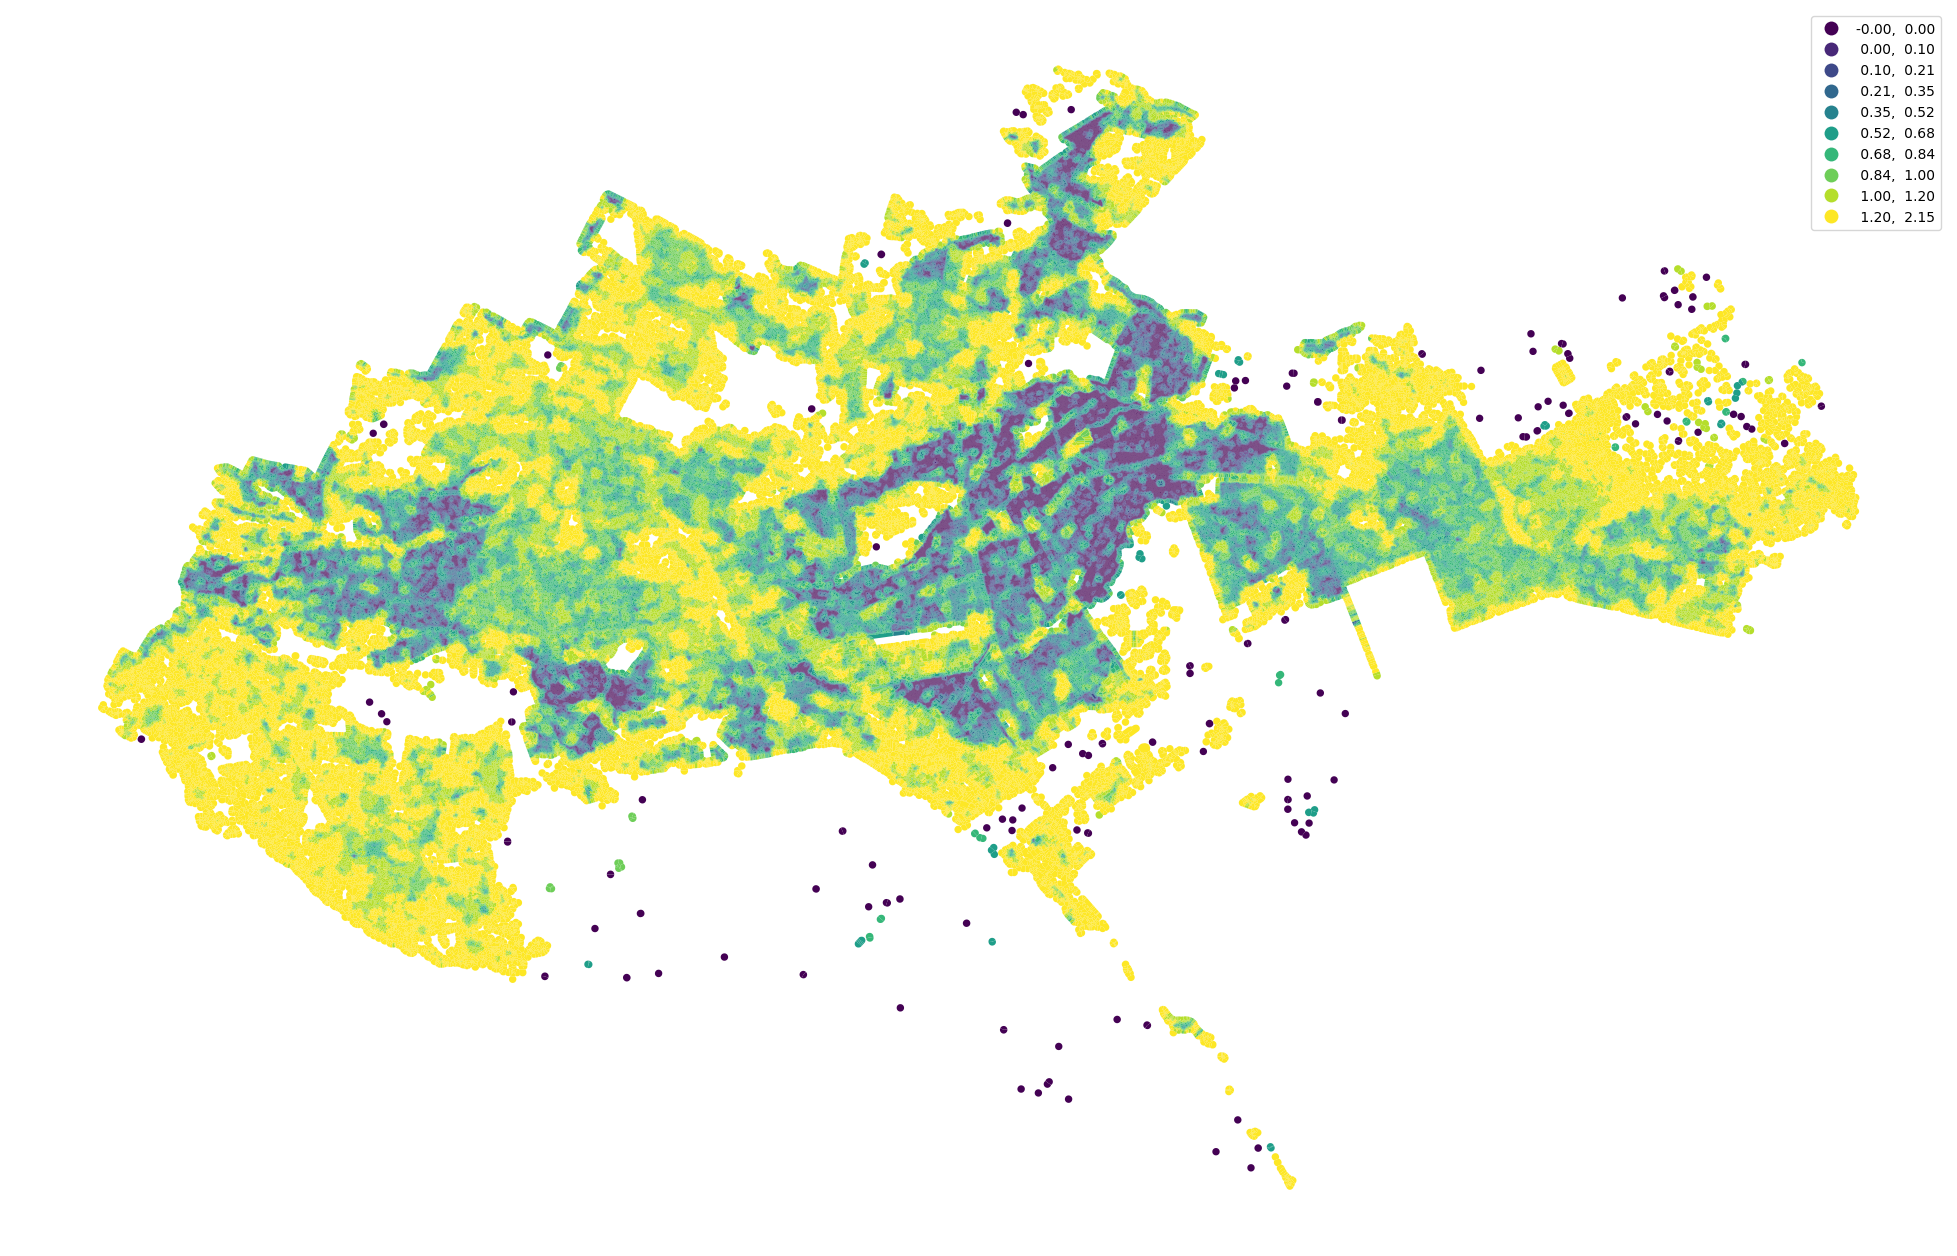

In [19]:
# f, ax = plt.subplots(figsize=(25, 25))
# Tessellation.plot(ax=ax, column='area_Shannon', legend=True, scheme='quantiles', k=10, cmap='viridis')
# ax.set_axis_off()
# plt.show()

In [21]:
# Tessellation.head()

,uID,FID,bID,geometry,tcOri,sdcLAL,sdcArea,sscCCo,sscERI,mtcWNe,...,ltcWRB,sicCAR,sicFAR,stcSAl,nodeID,area_Gini,area_IQR_3steps,area_Shannon,area_Simpson,area_Theil
0,431260,24677.0,0.0,"POLYGON ((273015.419 9840919.545, 273086.359 9...",28.931809,194.936971,15509.263225,0.519652,1.058188,0.008373,...,0.000021,0.000468,0.000664,3.433736,22337.0,0.535479,1741.369988,1.489849,0.242188,0.525951
1,740286,36150.0,1.0,"POLYGON ((265608.399 9843726.329, 265611.032 9...",16.530380,207.396118,33334.176740,0.986731,1.127858,0.000000,...,0.000030,0.000630,0.000894,21.362023,29438.0,0.000000,0.000000,-0.000000,1.000000,0.000000
2,490551,101.0,2.0,"POLYGON ((251512.171 9846768.106, 251537.773 9...",1.416712,205.094737,31254.701256,0.946055,1.116321,0.001577,...,0.000017,0.000364,0.000517,1.129779,138.0,0.613891,8647.389290,1.871160,0.163265,0.671798
3,71958,39177.0,4.0,"POLYGON ((249482.718 9847023.289, 249500.810 9...",29.426127,156.468596,8638.243604,0.449243,0.946552,0.014761,...,0.000031,0.011866,0.000000,22.699480,32152.0,0.513085,1400.434345,1.229839,0.337370,0.459680
4,592454,39215.0,7.0,"POLYGON ((248621.314 9847365.456, 248628.536 9...",10.225488,135.493594,8146.605543,0.565001,0.978515,0.016211,...,0.000014,0.029888,0.023911,3.357694,32184.0,0.626479,2077.195830,1.353598,0.306228,0.715779


In [22]:
Tessellation.to_parquet('Tessellation_Metrics.parquet')

In [25]:
merged = primary.merge(Tessellation.drop(columns=['FID', 'bID', 'geometry']), on='uID')

In [28]:
merged.columns

Index(['uID', 'geometry', 'tcOri_x', 'sdcLAL_x', 'sdcArea_x', 'sscCCo_x',
       'sscERI_x', 'mtcWNe_x', 'mdcAre_x', 'floor_area_x_x', 'floor_area_y_x',
       'licGDe_x', 'ltcWRB_x', 'sicCAR_x', 'sicFAR_x', 'stcSAl_x', 'height',
       'area_in_me', 'confidence', 'bArea', 'bVol', 'bPer', 'bCoA', 'bFoF',
       'bVFR', 'bCCo', 'bCor', 'bSqu', 'bERI', 'bElo', 'ssbCCM', 'ssbCCD',
       'mtbSWR', 'bOri', 'mtbAli', 'mtbNDi', 'libNCo', 'ldbPWL', 'ltbIBD',
       'ltcBuA', 'stbSAl', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA',
       'ltkOri', 'ltkWNB', 'likWBB', 'sdsLen', 'sdsSPW', 'sdsSPH', 'sdsSPR',
       'sdsSPO', 'sdsSWD', 'sdsSHD', 'sssLin', 'sdsAre', 'sisBpM', 'misRea',
       'mdsAre', 'ldsMSL', 'ldsRea', 'degree', 'meshedness', 'proportion_3',
       'proportion_4', 'proportion_0', 'local_closeness', 'ldsCDL', 'xcnSCl',
       'mtdMDi', 'lddNDe', 'linWID', 'lddRea', 'tcOri_y', 'sdcLAL_y',
       'sdcArea_y', 'sscCCo_y', 'sscERI_y', 'mtcWNe_y', 'mdcAre_y',
       'floor_area_x

In [29]:
merged.to_parquet('Final_Metrics.parquet')
merged.to_file('Final_Metrics.shapefile')

/tmp/ipykernel_1760/1524661807.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged.to_file('Final_Metrics.shapefile')


# another way to calculate contextual characters

shanon and simpson diversities

In [27]:
gdf = primary.set_index('uID')
spatial_weights = queen_3
unique_id = 'uID'

In [7]:
means = {}
ranges = {}
theils = {}
simpsons = {}

for ch in gdf.columns:
    means[ch] = []
    ranges[ch] = []
    theils[ch] = []
    simpsons[ch] = []

In [8]:
gdf = gdf.replace(np.inf, np.nan).fillna(0)  # normally does not happen, but to be sure
chars = gdf.columns

In [28]:
gdf.columns 

Index(['geometry', 'tcOri', 'sdcLAL', 'sdcArea', 'sscCCo', 'sscERI', 'mtcWNe',
       'mdcAre', 'floor_area_x', 'floor_area_y', 'licGDe', 'ltcWRB', 'sicCAR',
       'sicFAR', 'stcSAl', 'height', 'area_in_me', 'confidence', 'bArea',
       'bVol', 'bPer', 'bCoA', 'bFoF', 'bVFR', 'bCCo', 'bCor', 'bSqu', 'bERI',
       'bElo', 'ssbCCM', 'ssbCCD', 'mtbSWR', 'bOri', 'mtbAli', 'mtbNDi',
       'libNCo', 'ldbPWL', 'ltbIBD', 'ltcBuA', 'stbSAl', 'ldkAre', 'ldkPer',
       'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'sdsLen',
       'sdsSPW', 'sdsSPH', 'sdsSPR', 'sdsSPO', 'sdsSWD', 'sdsSHD', 'sssLin',
       'sdsAre', 'sisBpM', 'misRea', 'mdsAre', 'ldsMSL', 'ldsRea', 'degree',
       'meshedness', 'proportion_3', 'proportion_4', 'proportion_0',
       'local_closeness', 'ldsCDL', 'xcnSCl', 'mtdMDi', 'lddNDe', 'linWID',
       'lddRea'],
      dtype='object')

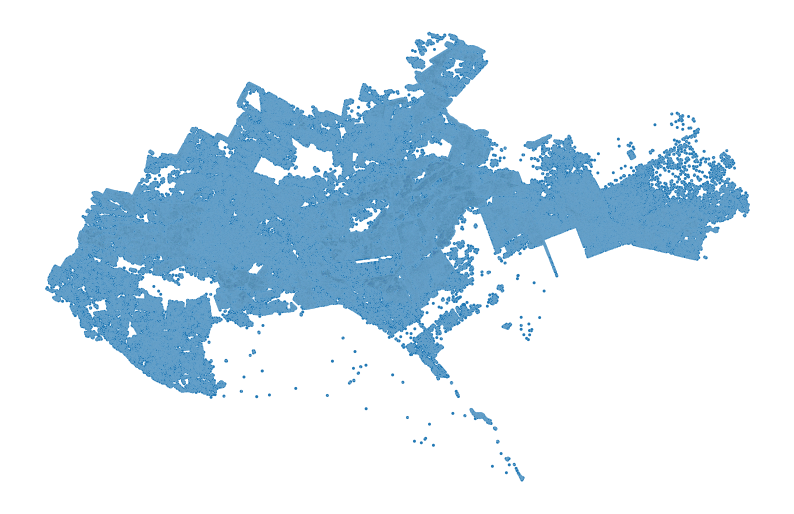

In [31]:
f, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [16]:
# gdf['lcdMes'] = gdf.apply(
#             lambda row: row.lcdMes if row.lcdMes >= 0 else 0,
#             axis=1,
#         )  # normally does not happen, but to be sure

Define Theil and Simpson functions.

In [17]:
def _theil(y):
    y = np.array(y)
    n = len(y)
    plus = y + np.finfo('float').tiny * (y == 0)  # can't have 0 values
    yt = plus.sum(axis=0)
    s = plus / (yt * 1.0)
    lns = np.log(n * s)
    slns = s * lns
    t = sum(slns)
    return t

In [18]:
def _simpson_di(data):

    def p(n, N):
        if n == 0:
            return 0
        return float(n) / N

    N = sum(data.values())

    return sum(p(n, N) ** 2 for n in data.values() if n != 0)

Skewness is used as an estimation of the distribution. Extremely skewed use HeadTail breaks for Simpson's binning, other Natural Breaks.

In [20]:
import scipy as sp

In [32]:
gdf=gdf.drop(columns=['geometry', 'area_in_me', 'confidence',])
gdf.columns

Index(['tcOri', 'sdcLAL', 'sdcArea', 'sscCCo', 'sscERI', 'mtcWNe', 'mdcAre',
       'floor_area_x', 'floor_area_y', 'licGDe', 'ltcWRB', 'sicCAR', 'sicFAR',
       'stcSAl', 'height', 'bArea', 'bVol', 'bPer', 'bCoA', 'bFoF', 'bVFR',
       'bCCo', 'bCor', 'bSqu', 'bERI', 'bElo', 'ssbCCM', 'ssbCCD', 'mtbSWR',
       'bOri', 'mtbAli', 'mtbNDi', 'libNCo', 'ldbPWL', 'ltbIBD', 'ltcBuA',
       'stbSAl', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri',
       'ltkWNB', 'likWBB', 'sdsLen', 'sdsSPW', 'sdsSPH', 'sdsSPR', 'sdsSPO',
       'sdsSWD', 'sdsSHD', 'sssLin', 'sdsAre', 'sisBpM', 'misRea', 'mdsAre',
       'ldsMSL', 'ldsRea', 'degree', 'meshedness', 'proportion_3',
       'proportion_4', 'proportion_0', 'local_closeness', 'ldsCDL', 'xcnSCl',
       'mtdMDi', 'lddNDe', 'linWID', 'lddRea'],
      dtype='object')

In [33]:
skewness = pd.DataFrame(index=chars)
for c in chars:
    skewness.loc[c, 'skewness'] = sp.stats.skew(gdf[c])
headtail = list(skewness.loc[skewness.skewness >= 1].index)
to_invert = skewness.loc[skewness.skewness <= -1].index

for inv in to_invert:
    gdf[inv + '_r'] = gdf[inv].max() - gdf[inv]
inverted = [x for x in gdf.columns if '_r' in x]
# headtail = headtail + inverted
# natural = [x for x in chars if x not in headtail]

KeyError: 'geometry'

In [37]:
for index in tqdm(range(len(gdf)), total=gdf.shape[0]):
    neighbours = [index]
    neighbours += spatial_weights.neighbors[index]

    subset = gdf.loc[neighbours]
    for ch in chars:
        values_list = subset[ch]
        idec = mm.limit_range(values_list, rng=(10, 90))
        iquar = mm.limit_range(values_list, rng=(25, 75))

        means[ch].append(np.mean(iquar))
        ranges[ch].append(max(iquar) - min(iquar))
        theils[ch].append(_theil(idec))

        sample_bins = mapclassify.UserDefined(values_list, list(bins[ch]))
        counts = dict(zip(bins[ch], sample_bins.counts))
        simpsons[ch].append(_simpson_di(counts))

  0%|          | 0/759037 [00:00<?, ?it/s]

KeyError: 0